In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn import preprocessing,svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import pickle
import xgboost
from imblearn.over_sampling import RandomOverSampler,SMOTE, RandomUnderSampler

Download the dataset from this link :- https://www.kaggle.com/krishnasrujan/loan-eligibility

In [2]:
train=pd.read_csv('C:/Users/Srujan/Documents/Datasets/Loan Eligibility/train.csv')
test=pd.read_csv('C:/Users/Srujan/Documents/Datasets/Loan Eligibility/test.csv')

In [3]:
train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Check if the dataset is balanced or not. If not balanced build a model with the unbalanced dataset.
Then use sampling techniques to create a balanced dataset. Then see if your model improves in terms of metrics.
In some cases sampling may result in overfitting/underfitting.

In [4]:
train['Loan_Status'].value_counts()

#It is unbalanced dataset.

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#droping loan_ID column as number of rows is equal to number of unique values in this column. 
train=train.drop('Loan_ID',axis=1)
ID= test['Loan_ID']
test=test.drop('Loan_ID',axis=1)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# creating a list of categorical features
cat_features=[feature for feature in train.columns if train[feature].dtype == 'object']
cat_features.remove('Loan_Status')
cat_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [8]:
# numerical features
num_features=[feature for feature in train.columns if train[feature].dtype != 'O']
num_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [9]:
#continuous and discrete feaures 
con_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
discrete_features = ['Loan_Amount_Term','Credit_History']

## Data Analysis

Analyzing mean and median applicant income,coapplicant income and loan amount and how it effects the loan status.

In [10]:
for feature in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    print(feature,'\nMean \n',train.groupby('Loan_Status')[feature].mean(),'\n')
    print('Median \n',train.groupby('Loan_Status')[feature].median(),'\n')

ApplicantIncome 
Mean 
 Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64 

Median 
 Loan_Status
N    3833.5
Y    3812.5
Name: ApplicantIncome, dtype: float64 

CoapplicantIncome 
Mean 
 Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64 

Median 
 Loan_Status
N     268.0
Y    1239.5
Name: CoapplicantIncome, dtype: float64 

LoanAmount 
Mean 
 Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64 

Median 
 Loan_Status
N    129.0
Y    126.0
Name: LoanAmount, dtype: float64 



Analyzing loan status for each categorical feature

In [11]:
for i,feature in enumerate(cat_features):
    print(train.groupby([feature,'Loan_Status'])['Loan_Status'].count())

Gender  Loan_Status
Female  N               37
        Y               75
Male    N              150
        Y              339
Name: Loan_Status, dtype: int64
Married  Loan_Status
No       N               79
         Y              134
Yes      N              113
         Y              285
Name: Loan_Status, dtype: int64
Dependents  Loan_Status
0           N              107
            Y              238
1           N               36
            Y               66
2           N               25
            Y               76
3+          N               18
            Y               33
Name: Loan_Status, dtype: int64
Education     Loan_Status
Graduate      N              140
              Y              340
Not Graduate  N               52
              Y               82
Name: Loan_Status, dtype: int64
Self_Employed  Loan_Status
No             N              157
               Y              343
Yes            N               26
               Y               56
Name: Loan_Status,

Exploring each categorical feature and understanding the relationship between each feature and Loan status.

Observations:

1) Loan approval is more for Males.

2) There are more married applicants and the percentage of approval seems to be more for married applicants.

3) Applicants with 0 dependents are more and the percentage of approval seems to be higher for applicants with 2 dependents.

4) Non graduate applicants are less compared to graduate applicants and percentage of approval is less for non graduate applicants.

5) Major fraction of the applicants are not self-employed.

6) More number of applicants are from semi-urban areas. Percentage of approval is highest for applicants from semi-urban areas and is least for appicants from rural areas.

For all the categorical features, checking the frequency of loan eligibility for male and female applicants

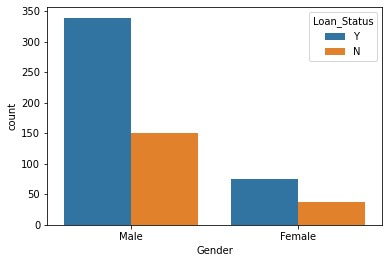

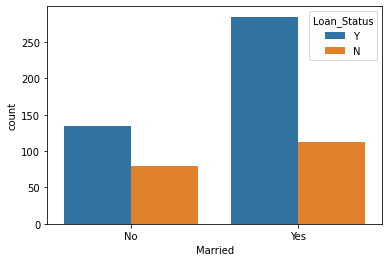

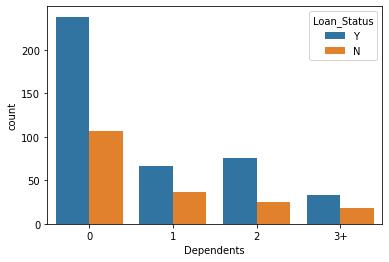

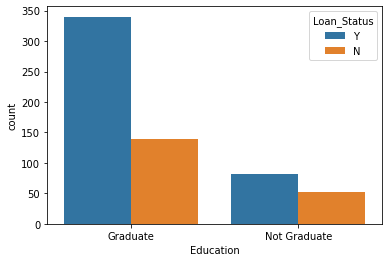

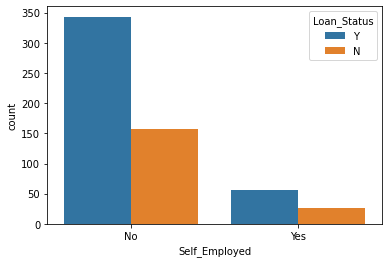

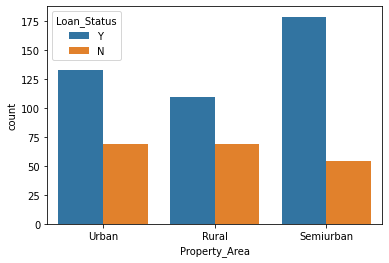

In [12]:
for i,feature in enumerate(cat_features):
    plt.figure(i)
    sns.countplot(x=feature,data=train,hue='Loan_Status')

Checking for outliers in numerical features

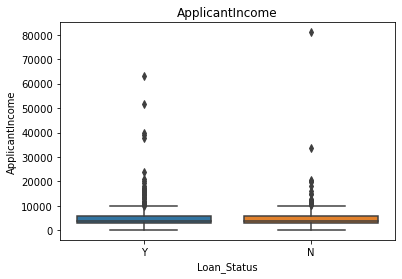

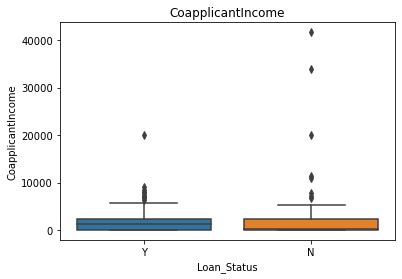

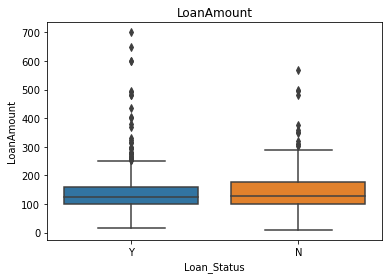

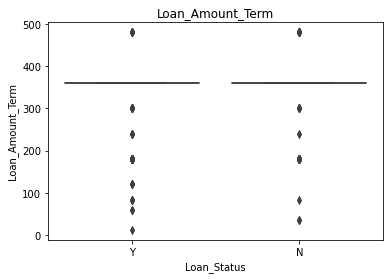

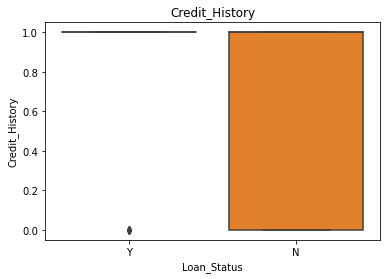

In [13]:
for i,feature in enumerate(num_features):
    plt.figure(i)
    sns.boxplot(y=feature,x='Loan_Status',data=train)
    plt.title(feature)
    plt.show()

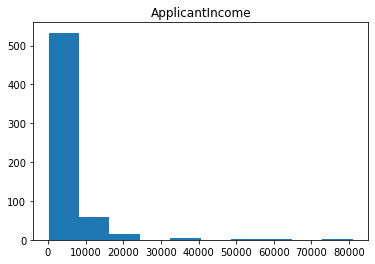

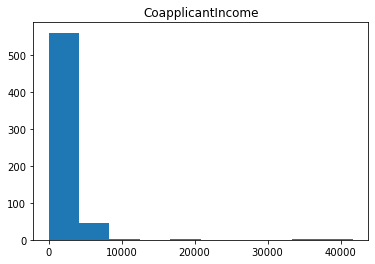

C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Srujan\Anaconda\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


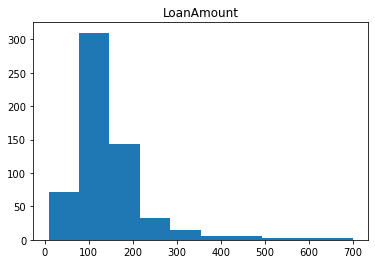

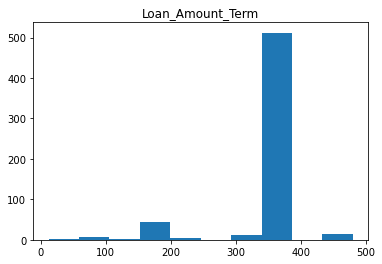

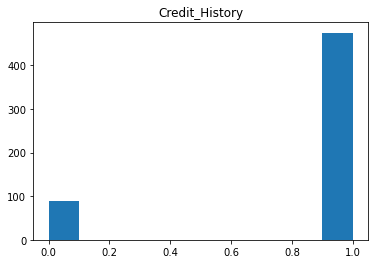

In [14]:
# checking the distribution of numerical features
for feature in num_features:
    plt.hist(train[feature])
    plt.title(feature)
    plt.show()

In [15]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Feature Engineering

Filling categorical features with mode.

In [16]:
for feature in cat_features:
    train[feature]=train[feature].fillna(train[feature].mode()[0])
    test[feature]=test[feature].fillna(test[feature].mode()[0])   

Even though there are outliers in numerical features, it's better to fill nulls with mean rather than median. This would preserve the distribution on the data and would work perfectly fine even if a new input is an outlier. If we fill nulls with median the model would not work well for inputs which actually contain outliers.

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [18]:
#### Encoding categrical Features: ##########

dict_1 = {'Urban':3, 'Semiurban':2 , 'Rural':1}
dict_2 = {'0':0,'1':1,'2':2,'3+':3}


train['Property_Area'] = train['Property_Area'].map(dict_1)
test['Property_Area'] = test['Property_Area'].map(dict_1)

train['Dependents'] = train['Dependents'].map(dict_2)
test['Dependents'] = test['Dependents'].map(dict_2)

train['Education'] = train['Education'].map({'Graduate':1,'Not Graduate':0})
test['Education'] = test['Education'].map({'Graduate':1,'Not Graduate':0})

train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

In [19]:
'''for feature in num_features:
    plt.hist(train[feature])
    plt.title(feature)
    plt.show()'''

'for feature in num_features:\n    plt.hist(train[feature])\n    plt.title(feature)\n    plt.show()'

In [20]:
for feature in num_features:
    train[feature]=train[feature].fillna(train[feature].mean())
for feature in num_features:
    test[feature]=test[feature].fillna(test[feature].mean())

In [21]:
train['Total_income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

In [22]:
train.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Self_Employed_Yes,Loan_Status_Y,Total_income
0,0,1,5849,0.0,146.412162,360.0,1.0,3,1,0,0,1,5849.0
1,1,1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,6091.0
2,0,1,3000,0.0,66.000000,360.0,1.0,3,1,1,1,1,3000.0
3,0,0,2583,2358.0,120.000000,360.0,1.0,3,1,1,0,1,4941.0
4,0,1,6000,0.0,141.000000,360.0,1.0,3,1,0,0,1,6000.0


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    int64  
 1   Education          614 non-null    int64  
 2   ApplicantIncome    614 non-null    int64  
 3   CoapplicantIncome  614 non-null    float64
 4   LoanAmount         614 non-null    float64
 5   Loan_Amount_Term   614 non-null    float64
 6   Credit_History     614 non-null    float64
 7   Property_Area      614 non-null    int64  
 8   Gender_Male        614 non-null    uint8  
 9   Married_Yes        614 non-null    uint8  
 10  Self_Employed_Yes  614 non-null    uint8  
 11  Loan_Status_Y      614 non-null    uint8  
 12  Total_income       614 non-null    float64
dtypes: float64(5), int64(4), uint8(4)
memory usage: 45.7 KB


In [24]:
train.to_csv('C:/Users/Srujan/Documents/Datasets/Loan Eligibility/modified_train.csv')
test.to_csv('C:/Users/Srujan/Documents/Datasets/Loan Eligibility/modified_test.csv')

In [35]:
oversample = RandomOverSampler(sampling_strategy=0.5)
X, y = oversample.fit_resample(X, y)

In [36]:
scale=preprocessing.StandardScaler()
X=scale.fit_transform(X)
test=scale.transform(test)

In [37]:
filename = 'C:/Users/Srujan/Documents/Python/Spyder Programs/Loan Eligibility/scale.pkl'
pickle.dump(scale,open(filename,'wb'))

In [38]:
#y = scale.transform(test[1].reshape(1,-1))
#print(y)

In [39]:
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.25,random_state=7,stratify  = y)

## Hyperparameter tuning

In [46]:
ran_params={'n_estimators':[100,75,50,150,125,175,50,200,250,40],
        'max_depth':[15,18,20,25,30,35,40,45],
        'min_samples_split':[5,3,4,6,7,8,9,11,4,12],
           'min_samples_leaf' : [2,3,4,5,6,7,8]}
ran=RandomForestClassifier()
ran_tun=RandomizedSearchCV(ran,ran_params,scoring='roc_auc',cv=5)
ran_tun.fit(X_train,y_train)
print(ran_tun.best_params_)
print(ran_tun.best_score_)

{'n_estimators': 250, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 30}
0.7913082437275986


In [47]:
ran=RandomForestClassifier(n_estimators=ran_tun.best_params_['n_estimators'],
                           min_samples_split= ran_tun.best_params_['min_samples_split'],
                           min_samples_leaf= ran_tun.best_params_['min_samples_leaf'],
                           max_depth=ran_tun.best_params_['max_depth'])
ran.fit(X_train,y_train)
acc=ran.score(X_eval,y_eval)
acc1=ran.score(X_train,y_train)
print(acc1,acc)
ran_train_preds=ran.predict(X_train)
ran_test_preds=ran.predict(X_eval)

print('log loss\n', metrics.log_loss(y_eval,ran_test_preds))
print("cost of training model\n",metrics.confusion_matrix(y_train,ran_train_preds))
print("cost of testing model\n",metrics.confusion_matrix(y_eval,ran_test_preds))
print("cost of training model\n",metrics.classification_report(y_train,ran_train_preds))
print("cost of testing model\n",metrics.classification_report(y_eval,ran_test_preds))
y_test1=ran.predict(test)

0.9324894514767933 0.7547169811320755
log loss
 8.471926209587563
cost of training model
 [[129  29]
 [  3 313]]
cost of testing model
 [[23 30]
 [ 9 97]]
cost of training model
               precision    recall  f1-score   support

           0       0.98      0.82      0.89       158
           1       0.92      0.99      0.95       316

    accuracy                           0.93       474
   macro avg       0.95      0.90      0.92       474
weighted avg       0.94      0.93      0.93       474

cost of testing model
               precision    recall  f1-score   support

           0       0.72      0.43      0.54        53
           1       0.76      0.92      0.83       106

    accuracy                           0.75       159
   macro avg       0.74      0.67      0.69       159
weighted avg       0.75      0.75      0.74       159



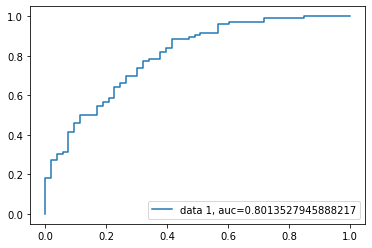

In [48]:
y_eval_probs = ran.predict_proba(X_eval)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_eval , y_eval_probs)
auc = metrics.roc_auc_score(y_eval, y_eval_probs)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [49]:
eclf = VotingClassifier(estimators=[
         ('svc', svc), ('ran', ran), ('xgb', xgb)], voting='soft')
eclf = eclf.fit(X_train,y_train)
acc=eclf.score(X_eval,y_eval)
acc1=eclf.score(X_train,y_train)

print(acc1,acc)

vot_train_preds=eclf.predict(X_train)
vot_test_preds=eclf.predict(X_eval)

print('log loss\n', metrics.log_loss(y_eval,vot_test_preds))
print("cost of training model\n",metrics.confusion_matrix(y_train,vot_train_preds))
print("cost of testing model\n",metrics.confusion_matrix(y_eval,vot_test_preds))
print("cost of training model\n",metrics.classification_report(y_train,vot_train_preds))
print("cost of testing model\n",metrics.classification_report(y_eval,vot_test_preds))

0.8438818565400844 0.7735849056603774
log loss
 7.820251183268494
cost of training model
 [[ 87  71]
 [  3 313]]
cost of testing model
 [[ 23  30]
 [  6 100]]
cost of training model
               precision    recall  f1-score   support

           0       0.97      0.55      0.70       158
           1       0.82      0.99      0.89       316

    accuracy                           0.84       474
   macro avg       0.89      0.77      0.80       474
weighted avg       0.87      0.84      0.83       474

cost of testing model
               precision    recall  f1-score   support

           0       0.79      0.43      0.56        53
           1       0.77      0.94      0.85       106

    accuracy                           0.77       159
   macro avg       0.78      0.69      0.70       159
weighted avg       0.78      0.77      0.75       159



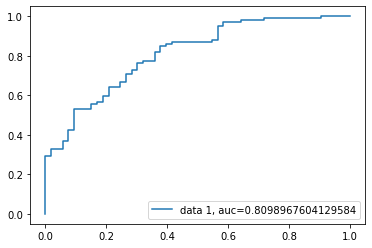

In [50]:
y_eval_probs = eclf.predict_proba(X_eval)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_eval , y_eval_probs)
auc = metrics.roc_auc_score(y_eval, y_eval_probs)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [51]:
y_preds = eclf.predict(test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [52]:
filename = 'C:/Users/Srujan/Documents/Python/Spyder Programs/Loan Eligibility/loan_eligibility.pkl'
pickle.dump(eclf,open(filename,'wb'))

In [58]:
sub = pd.DataFrame({'Loan_ID':ID,'Loan_Status':y_preds})
sub.set_index('Loan_ID',inplace=True)

In [60]:
sub['Loan_Status'].replace({1:'Y',0:'N'},inplace=True)
sub

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
...,...
LP002971,Y
LP002975,Y
LP002980,Y


In [61]:
sub.to_csv('C:/Users/Srujan/Documents/Datasets/Loan Eligibility/sub.csv')